# BPL_TEST2_Chemostat script with FMPy

The key library FMPy is installed.

After the installation a small application BPL_TEST2_Chemostat is loaded and run. You can continue with this example if you like.

In [1]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [2]:
%env PYTHONPATH=

env: PYTHONPATH=


In [3]:
!python --version

Python 3.11.11


In [4]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
!chmod +x Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
!bash ./Miniconda3-py311_24.11.1-0-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.11/site-packages/')

--2025-03-25 12:40:24--  https://repo.anaconda.com/miniconda/Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145900576 (139M) [application/octet-stream]
Saving to: ‘Miniconda3-py311_24.11.1-0-Linux-x86_64.sh’

Miniconda3-py311_24 100%[===================>] 139.14M  61.0MB/s    in 2.3s    

2025-03-25 12:40:27 (61.0 MB/s) - ‘Miniconda3-py311_24.11.1-0-Linux-x86_64.sh’ saved [145900576/145900576]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.


In [5]:
!conda update -n base -c defaults conda --yes

Channels:
 - defaults
Platform: linux-64
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.2.25  |       h06a4308_0         129 KB
    certifi-2025.1.31          |  py311h06a4308_0         163 KB
    openssl-3.0.16             |       h5eee18b_0         5.2 MB
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

  ca-certificates                     2024.11.26-h06a4308_0 --> 2025.2.25-h06a4308_0 
  certifi                         2024.8.30-py311h06a4308_0 --> 2025.1.31-py311h06a4308_0 
  openssl                                 3.0.15-h5eee18b_0 --> 3.0.16-h5eee18b_0 



openssl-3.0.16       | 5.2 MB    | :   0% 0/1 [00:00<?,

In [6]:
!conda --version
!python --version

conda 24.11.1
Python 3.11.11


In [7]:
!conda config --set channel_priority strict

In [8]:
!conda install -c conda-forge fmpy --yes # Install the key package

Streaming output truncated to the last 5000 lines.
libgoogle-cloud-2.12 | 41.5 MB   | :  90% 0.9044749071694606/1 [00:01<00:00,  1.22s/it]
qt-main-5.15.15      | 50.2 MB   | :  76% 0.7608411915447602/1 [00:01<00:00,  1.57s/it]

qt-webengine-5.15.15 | 48.8 MB   | :  79% 0.7905834430688699/1 [00:01<00:00,  1.38s/it]


kaleido-core-0.2.1   | 59.2 MB   | :  73% 0.7271233141244001/1 [00:01<00:00,  1.74s/it]
qt-main-5.15.15      | 50.2 MB   | :  83% 0.8256201386758736/1 [00:01<00:00,  1.73s/it]

kaleido-core-0.2.1   | 59.2 MB   | :  81% 0.8068008325807022/1 [00:01<00:00,  1.59s/it]
qt-main-5.15.15      | 50.2 MB   | :  90% 0.8963163934776175/1 [00:01<00:00,  1.64s/it]

kaleido-core-0.2.1   | 59.2 MB   | :  89% 0.8943933363141205/1 [00:01<00:00,  1.44s/it]
kaleido-core-0.2.1   | 59.2 MB   | :  97% 0.9719601920298585/1 [00:01<00:00,  1.39s/it]



pillow-11.1.0        | 40.1 MB   | : 100% 1.0/1 [00:02<00:00,  1.19s/it]               




libllvm19-19.1.7     | 38.3 MB   | :   0% 0.0004081343589

## Now specific installation run a simulation and notebook for that

Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Chemostat_linux_om_me.fmu
* Setup-file - BPL_TEST2_Chemostat_fmpy_explore.py

In [9]:
%%bash
git clone https://github.com/janpeter19/BPL_TEST2_Chemostat

Cloning into 'BPL_TEST2_Chemostat'...


In [10]:
%cd BPL_TEST2_Chemostat

/content/BPL_TEST2_Chemostat


## BPL_TEST2_Chemostat - demo

In [11]:
run -i BPL_TEST2_Chemostat_fmpy_explore.py

Linux - run FMU pre-compiled OpenModelica

Model for the process has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [12]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

No processDiagram.png file in the FMU, but try the file on disk.


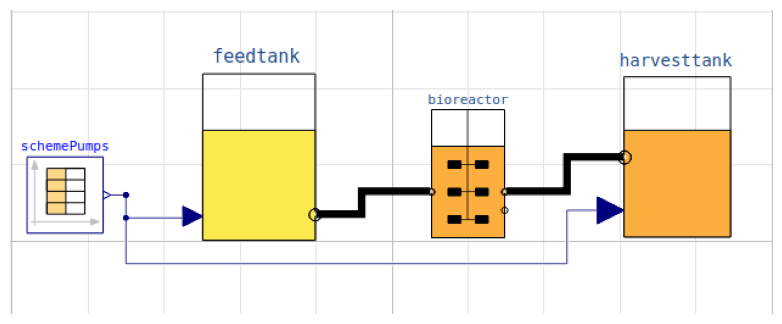

In [13]:
process_diagram()

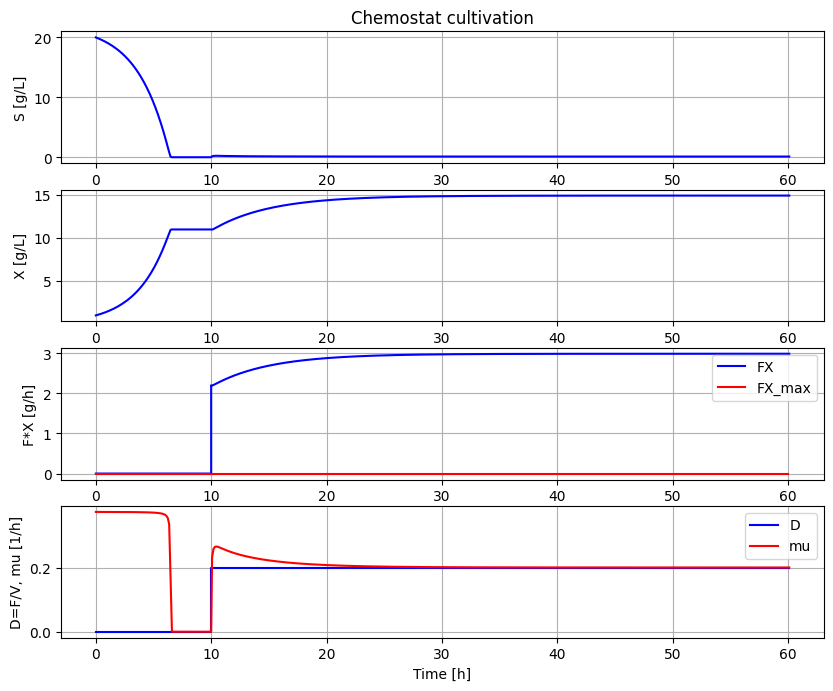

In [14]:
newplot()
par(Y=0.50, qSmax=0.75,  Ks=0.1)               # Culture parameters
init(V_start=1.0, VX_start=1.0, VS_start=20)   # Bioreactor startup
par(S_in=30, t0=0, F0=0, t1=10, F1=0.2)        # Substrate feeding
simu(60)

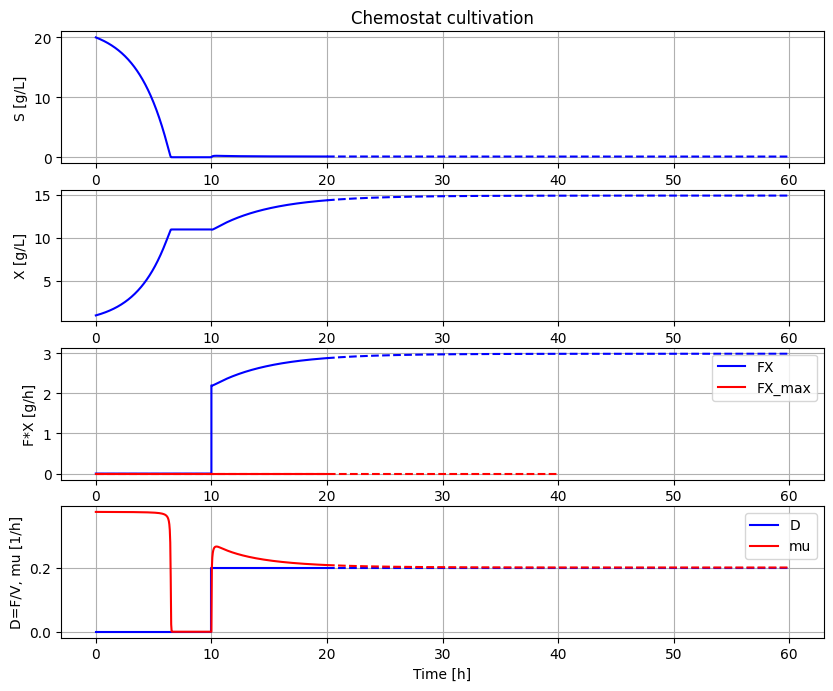

In [15]:
# Test simu('cont')
newplot()
simu(20)
simu(40,'cont')

In [16]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'D', 'feedtank', 'harvesttank', 'schemePumps']


In [17]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput, CombiTimeTable, Types


In [18]:
system_info()


System information
 -OS: Linux
 -Python: 3.11.11
 -Scipy: not installed in the notebook
 -FMPy: 0.3.19
 -FMU by: OpenModelica Compiler OpenModelica 1.25.0~dev-133-ga5470be
 -FMI: 2.0
 -Type: ME
 -Name: BPL.Examples_TEST2.Chemostat
 -Generated: 2024-11-06T21:37:41Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.3.0
 -Interaction: FMU-explore for FMPy version 1.0.1
